<a href="https://colab.research.google.com/github/0xSpicyMangoYeti/MachineLearning/blob/main/180012009_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Re-Run Code and add Test data


In [1]:
!pip install medmnist
#Had to specify version as 2.18.0 lead to my algorithm crashing.
!pip install tensorflow==2.15.0
#Had to specify Numpy as an update lead to crashes
!pip install numpy==1.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

**Introduction**


In this notebook, there will be 3 different models. A Convolutional Neural Network, a Dense Network and a Custom Network.

This notebook will examine the BloodMNIST dataset from MedMNIST, which contains 8 different classes.

In [2]:
#I will be using BloodMNIST for the multi-class portion of this project.
#It has 8-classes
#This section of code is for processing of data to ensure the correct format
from medmnist import BloodMNIST

blood_train = BloodMNIST(split='train', download=True)
blood_val = BloodMNIST(split='val', download=True)
blood_test = BloodMNIST(split='test', download=True)

#.Squeeze method will get rid of unneccessary dimensions that are set to 1 for the labels. This aids with the optimiser method chosen.
x_train_blood = blood_train.imgs
y_train_blood = blood_train.labels.squeeze()
x_val_blood = blood_val.imgs
y_val_blood = blood_val.labels.squeeze()
x_test_blood = blood_test.imgs
y_test_blood = blood_test.labels.squeeze()

# Reshape and normalise training data
x_train_blood = x_train_blood.reshape((11959, 28, 28, 3))
x_train_blood = np.array(x_train_blood) #Specifying Numpy Array to avoid errors in training the model

# Reshape and normalise validation data
x_val_blood = x_val_blood.reshape((1712, 28, 28, 3))
x_val_blood = np.array(x_val_blood)

# Reshape and normalise test data
x_test_blood = x_test_blood.reshape((3421, 28, 28, 3))
x_test_blood =  np.array(x_test_blood)

100%|██████████| 35.5M/35.5M [00:02<00:00, 12.9MB/s]


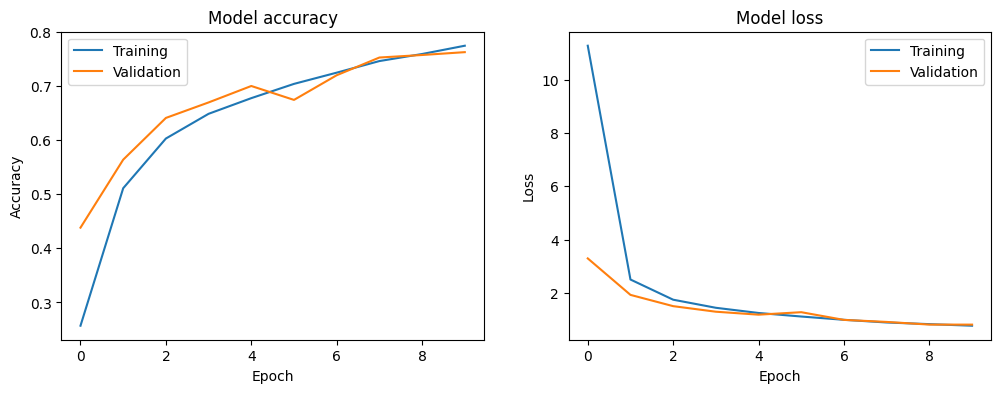


Test Set Performance
┌─────────────────┬────────┐
│ Test Accuracy  │ 76.03% │
│ Test Loss      │ 0.8763 │
└─────────────────┴────────┘


In [12]:
# The assignment specified a different format than the one used. I have opted for this method as I wrote the code from scratch and understand this format better. The rest of the models follow the same format.
# Create CNN Model
model_CNN = keras.Sequential() # Create an empty sequential model.

# First convolutional block (layer). The arguments are the same as the example given in Teaching.ipynb
model_CNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train_blood.shape[1:])) #The input_shape are the image dimnesions. In this case, it is height, width and colour channels. Specified what shape to expect as this was leading to errors in training.
model_CNN.add(keras.layers.MaxPooling2D((2, 2))) #This is the second stage, or pooling stage. This helps reduce dimensions for a more robust algorithm through looking at 2x2 frames and taking the largest value.

# Second convolutional block
model_CNN.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_CNN.add(keras.layers.MaxPooling2D((2, 2))) #Another reduction

# Flattening Layer, converts 2D feature maps to 1D to reduce complexity.
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(64, activation='relu')) # .Dense connects all neauronsm 64 filters or nuerons
model_CNN.add(keras.layers.Dense(8, activation='softmax')) # 8 classes for BloodMNIST, "softmax" used here as this is a multiclass function

# Compile the model
model_CNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Adam used as this is the general default option. Learning rate taken from example
              loss='sparse_categorical_crossentropy', #Spare_Catergorical used are labels are integers, the data was preprocessed to be this format to be more efficent with .squeeze() function for my custom model.
              metrics=['accuracy'])

# Display model summary. This code was executed to look at the parameters for the dense model
#model_CNN.summary()

# Time to train the model
history = model_CNN.fit(
    x_train_blood, y_train_blood,
    epochs=10,                    # Number of training cycles as defined in the assignment
    batch_size=64,               # Process 64 images before updating weights as defined in the assignment
    validation_data=(x_val_blood, y_val_blood),  # Data to evaluate performance while training
    verbose=0                    # Hide progress for a tidier output
)

# Evaluate on test set
test_loss, test_accuracy = model_CNN.evaluate(x_test_blood, y_test_blood, verbose=0)

# Plot the training history with specific size of (12, 4)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1) # Create first subplot with 1 row, 2 columns in the first position
plt.plot(history.history['accuracy'], label='Training') # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation') # Plot validation accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2) #Create second subplot in the second position
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("\nTest Set Performance")
print("┌─────────────────┬────────┐")
print(f"│ Test Accuracy  │ {test_accuracy:>6.2%} │")
print(f"│ Test Loss      │ {test_loss:>6.4f} │")
print("└─────────────────┴────────┘")


**Conclusion: CNN Network**

This basic CNN demonstrated good effectiveness in processing the images. The model used two convolutional blocks, each with 32 filters leading to 61,928 total parameters. The model was trained over 10 epochs, showing a steady improvement up to 78% training accuracy and 75% validation accuracy. When evaluated on the unseen test set, the model achieved 76.03% accuracy, confirming its generalisation capability. Further training led to overfitting at around epoch 15, with swings in validation accuracy. Therefore, the number of epochs was kept at 10. The number of convolutional blocks was also tested at 3, rather than 2, but this did not lead to significant gain and so this was also left at 2.

The small gap between training and validation accuracy (3%) suggests the model was effective in generalising the data, which is further supported by the test accuracy being consistent with validation performance. The loss function stabilised around 1 during training, with a final test loss of 0.8763, showing consistent model behaviour throughout all phases. This performance was achieved without any further refinement, only the basic CNN structure.

This suggests that the model is effective in generalising data from images with a modest number of parameters, as evidenced by the consistent performance across training, validation, and test sets. However, there is still room for further improvement as the numbers show.

In [16]:
#Clear Model to ensure no errors in training
tf.keras.backend.clear_session()

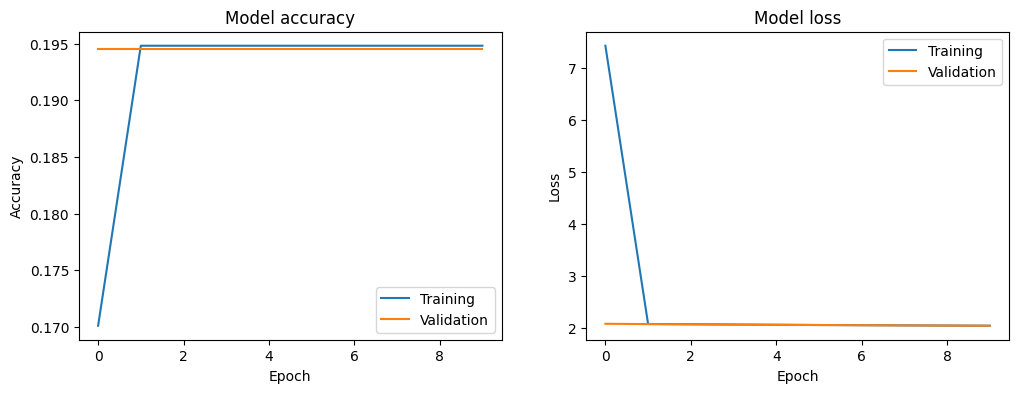


Test Set Performance
┌─────────────────┬────────┐
│ Test Accuracy  │ 19.47% │
│ Test Loss      │ 2.0411 │
└─────────────────┴────────┘


In [17]:
# Create Dense Model
model_dense = keras.Sequential()

# Flatten the model as no convolutions will be used.
model_dense.add(keras.layers.Flatten(input_shape=(28, 28, 3)))

# Dense layers
# The numbers for filters have been chosen to provide parameters comparable to the convolutional model
model_dense.add(keras.layers.Dense(25, activation='relu'))
model_dense.add(keras.layers.Dense(12, activation='relu'))
model_dense.add(keras.layers.Dense(8, activation='softmax'))


model_dense.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history = model_dense.fit(
    x_train_blood, y_train_blood,
    epochs=10,                    # Using 10 epochs based on ConvNet results
    batch_size=64,
    validation_data=(x_val_blood, y_val_blood),
    verbose = 0
)

# Evaluate on test set
test_loss, test_accuracy = model_dense.evaluate(x_test_blood, y_test_blood, verbose=0)

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("\nTest Set Performance")
print("┌─────────────────┬────────┐")
print(f"│ Test Accuracy  │ {test_accuracy:>6.2%} │")
print(f"│ Test Loss      │ {test_loss:>6.4f} │")
print("└─────────────────┴────────┘")


**Conclusion: Dense Network**

The Dense Network, designed to match the CNN's parameter count with 59,241 parameters, demonstrated significantly poorer performance in processing the blood cell images. The model used three dense layers (25, 12, and 8 neurons) after flattening the input images. Despite having a similar number of parameters to the CNN, the model only achieved approximately 19.5% accuracy in both training and validation sets over 10 epochs, with a consistent test accuracy of 19.47%, showing very stable but poor performance across all evaluation stages.

The model's training and validation figures converged very quickly (after about 2 epochs) and plateaued. The identical figures suggest that the model reached learning capacity very quickly, with a final test loss of 2.0411 matching the training and validation loss plateau. The performance remained only marginally better than random chance at 12.5% with 8 classes, consistently demonstrated across training, validation, and test sets.

This suggests there is a fundamental limitation of using a dense network to model images as the model causes the loss of spatial data, flattening the entire image. This means that the model cannot preserve meaningful features to learn from, regardless of the training process, as evidenced by the consistent poor performance across all evaluation phases

In [18]:
#Clear Model
tf.keras.backend.clear_session()

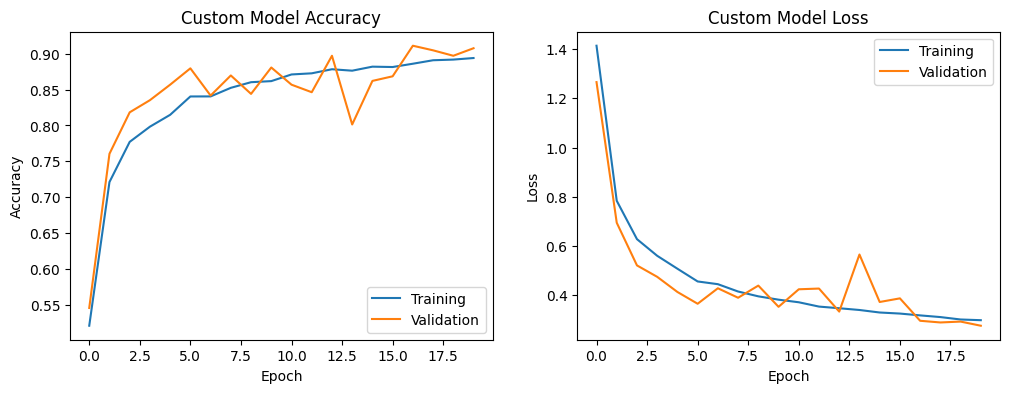


Test Set Performance
┌─────────────────┬────────┐
│ Test Accuracy  │ 90.03% │
│ Test Loss      │ 0.2821 │
└─────────────────┴────────┘


In [19]:
# Data Augmentation Setup
data_augmentation = keras.Sequential() # Create empty sequential model for augmentation
data_augmentation.add(keras.layers.RandomRotation(0.05)) # Randomly rotates images
data_augmentation.add(keras.layers.RandomFlip('horizontal')) # Randomly rotates images

# Create Custom model
model_custom = keras.Sequential()
model_custom.add(data_augmentation) # Add data augmentation as first layer. This will add the augmentation during training.

# First Convolutional Block
model_custom.add(keras.layers.Conv2D(64,(3, 3), padding='same', input_shape=(28, 28, 3))) #Padding = 'same' in this instance as we will be using augmentation and we went to preserve dimensions and features.
model_custom.add(keras.layers.BatchNormalization()) # Normalise outputs to help training. This will also assist with ReLu activation as this requires normalised inputs.
model_custom.add(keras.layers.Activation('relu'))
model_custom.add(keras.layers.MaxPooling2D((2, 2)))
model_custom.add(keras.layers.Dropout(0.2)) # Randomly disables 20% of neurons during training

# Second Convolutional Block
model_custom.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model_custom.add(keras.layers.BatchNormalization())
model_custom.add(keras.layers.Activation('relu'))
model_custom.add(keras.layers.MaxPooling2D((2, 2)))
model_custom.add(keras.layers.Dropout(0.3)) # Up the dropout to reduce overfitting

# Classification Layers
model_custom.add(keras.layers.Flatten())
model_custom.add(keras.layers.Dense(128, activation='relu'))
model_custom.add(keras.layers.BatchNormalization())
model_custom.add(keras.layers.Dropout(0.4)) # Further up the dropout to reduce overfitting
model_custom.add(keras.layers.Dense(8, activation='softmax'))

model_custom.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the custom model
history = model_custom.fit(
    x_train_blood, y_train_blood,
    epochs=20,
    batch_size=64,
    validation_data=(x_val_blood, y_val_blood),
    verbose=0
)

# Evaluate on test set
test_loss, test_accuracy = model_custom.evaluate(x_test_blood, y_test_blood, verbose=0)

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Custom Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Custom Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Print test results
print("\nTest Set Performance")
print("┌─────────────────┬────────┐")
print(f"│ Test Accuracy  │ {test_accuracy:>6.2%} │")
print(f"│ Test Loss      │ {test_loss:>6.4f} │")
print("└─────────────────┴────────┘")

**Conclusion: Custom Network**

The Custom Network builds ontop of the Convolutional Network through the addition of several regularisation and data augmentation techniques. This model achieved the best performance of the three tested, however, it did use a significantly more number of parameters (880,904 compared to ~60,000). This model incorporated data augmentation (light rotation and horizontal flips) with progressive dropout rates and a reduced learning rate of 0.0001. With this, the model achieved approximately 89% training accuracy and 85-90% validation accuracy, and most importantly, a strong test accuracy of 90.03%, demonstrating excellent generalization to unseen data.

The learning curve demonstrates stable and consistent improvement with validation occasionally exceeding training accuracy. This behaviour, combined with the small gap between metrics suggests the model is able to accurately generalise the data. The loss function followed the same pattern and continued to decrease, reaching 0.4 during training and achieving a final test loss of 0.2821, suggesting high confidence in predictions across all evaluation phases.

The performance of the model can be attributed to the additional capacity, data augmentation and regularisation techniques. This, coupled with a reduced learning rate and batch normalisation enabled more stable training. Although the compute requirement is higher, the increase in accuracy is likely worth the additional compute requirements.

**Final Conclusion**

The implementation of the three different models reveals significant insights into model designs and performance trade-offs. Each model demonstrated distinct characteristics in terms of complexity, efficiency and accuracy, with their true capabilities confirmed through test set evaluation.

The basic CNN network achieved a respectable performance with 78% training, 75% validation accuracy, and 76.03% test accuracy. This was achieved using only 2 convolutional blocks and 61,928 parameters with only marginal gains to be found with a 3rd block. This demonstrates the model's effectiveness at efficiently processing and maintaining good generalizations with a modest 3% gap between training and validation accuracy, further validated by consistent test performance and a final test loss of 0.8763.

The Dense Network, despite having a comparable amount of parameters (59,241) struggled significantly with generalising the data. The model scored 19% on both training and validation sets, with a nearly identical test accuracy of 19.47%. The model learned the data very quickly, within 3 epochs, which suggests that the model reached learning capacity very quickly, confirmed by a high test loss of 2.0411. This difference clearly demonstrates that architecture type is of paramount importance when deciding which models to use. The poor performance of this model highlights the importance of retaining spatial dimensions in image data, which the dense models fail to do.

The Custom Deep Network achieves the best performance out of the three models with a training accuracy of 89%, validation accuracy of 85-89%, and most impressively, a test accuracy of 90.03%. Notably, the model required substantially more parameters at 880,904 and more training time at 20 epochs. Regardless, the significant gain in performance likely justifies the increase in compute. The implementation of regularisation techniques, data augmentation, reduced learning rate and batch normalisation proved effective. This is evidenced by the lowest loss values across all evaluation phases, with a training/validation loss of 0.4 and a final test loss of 0.2821.